How to numerically show that one league is more competitive than another ?

First easy way is to compare the number of unique team winning the league in a stated time frame, say a decade.

But this is not enough, for example a league with one team winning 9 time and another winning 1 time would have the same number of unique winner as a league with 2 team with 5 win each, but everyone would agree that the latter is more competitive.

Using the average number of win for the team that won it may be a better statisitical indicator. In the last example it would be 5 against 5. Still not good enough, what about standard deviation ? 

With standard deviation we would have :

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
LeagueA = [9,1]
LeagueB = [5,5]
print (np.std(LeagueA))
print (np.std(LeagueB))


4.0
0.0


Ok that's better, what about 10 team winning once, in this case the std would be 0 as well, but it would be more competitive than LeagueB. The average would be lower though, if we simply added the std and the mean it probably wouldn't be perfect but a low number would mean more team winning and a more equitable distribution of said winnings.

In [2]:
LeagueC=[1]*10
print ("league A :",np.std(LeagueA)+ np.mean(LeagueA))
print ("league B :",np.std(LeagueB)+ np.mean(LeagueB))
print ("league C :",np.std(LeagueC)+ np.mean(LeagueC))


league A : 9.0
league B : 5.0
league C : 1.0


This looks good, we will call this value "competitivity level".

A league competitivity is not only defined by who gets the trophy but also by who can compete for top european spot and who gets relegated,for example a league which would have only 23 unique team playing in a decade would show a massive gap of quality between the first 17 and the rest. 

The mean of point gained during a season for the whole league would be useless in this case since it would only depend on the number of draw (a draw would add only 2 points to the total compared to a win who would add 3). 

The std of point gained for the whole league would be a good indicator, again, the lower the std the closer the team are to each other.

The number of unique participant in the league would show variety in the league which would be a good indicator as well.

And lastly the std + mean (Competitivity level) of finish in the top 6.

We will try to compare the league using those indicator, and to make it easy to digest (this is for reddit after all) we will make the final standing using the average position for each indicator.

This way we will be able to declare which league is the most competitive in the last decade and see if the circlePLjerk is warranted or not.

(Note : for 18 team league we will have to find a way to normalize)


The issue is that it's really hard to find good data, or you have to pay which, eh.

## Scraping of transfert market, what can you do

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

we will start with la liga and go from there

In [4]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/laliga/tabelle/wettbewerb/ES1?saison_id=20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,20):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
        
Liga = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,"League" :"Liga","Season": SeasonList})
Liga.tail(10)

,Team,Standing,Points,League,Season
190,Celta de Vigo,11,46,Liga,2021
191,Rayo Vallecano,12,42,Liga,2021
192,Elche CF,13,42,Liga,2021
193,Esp. Barcelona,14,42,Liga,2021
194,FC Getafe,15,39,Liga,2021
195,RCD Mallorca,16,39,Liga,2021
196,Cádiz CF,17,39,Liga,2021
197,FC Granada,18,38,Liga,2021
198,UD Levante,19,35,Liga,2021
199,Alavés,20,31,Liga,2021


I wanted to showcase the top 7 league in europe as well as league from different continent, but I didn't want to include 16 or below team league, and avoid league that had a size change in the last decade, so I went with what I had, sorry if your league is not included.

In [5]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/premier-league/tabelle/wettbewerb/GB1/saison_id/20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,20):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
        
Epl = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList, 'League': 'Epl',"Season": SeasonList})
Epl.head(10)


,Team,Standing,Points,League,Season
0,Manchester Utd.,1,89,Epl,2012
1,Manchester City,2,78,Epl,2012
2,Chelsea,3,75,Epl,2012
3,FC Arsenal,4,73,Epl,2012
4,Tottenham,5,72,Epl,2012
5,FC Everton,6,63,Epl,2012
6,Liverpool,7,61,Epl,2012
7,West Brom,8,49,Epl,2012
8,Swansea City,9,46,Epl,2012
9,West Ham Utd.,10,46,Epl,2012


In [6]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/serie-a/tabelle/wettbewerb/IT1?saison_id=20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,20):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
        
Seriea = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'League': 'Seriea',"Season": SeasonList})
Seriea.head(10)

,Team,Standing,Points,League,Season
0,Juventus Turin,1,87,Seriea,2012
1,Napoli,2,78,Seriea,2012
2,AC Milan,3,72,Seriea,2012
3,Fiorentina,4,70,Seriea,2012
4,Udinese,5,66,Seriea,2012
5,AS Roma,6,62,Seriea,2012
6,Lazio Rome,7,61,Seriea,2012
7,Catania Calcio,8,56,Seriea,2012
8,Inter,9,54,Seriea,2012
9,Parma,10,49,Seriea,2012


In [7]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/bundesliga/tabelle/wettbewerb/L1?saison_id=20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,18):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
Bdsl = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'League': 'Bdsl',"Season": SeasonList})
Bdsl

,Team,Standing,Points,League,Season
0,Bayern Munich,1,91,Bdsl,2012
1,Bor. Dortmund,2,66,Bdsl,2012
2,B. Leverkusen,3,65,Bdsl,2012
3,FC Schalke 04,4,55,Bdsl,2012
4,SC Fribourg,5,51,Bdsl,2012
...,...,...,...,...,...
175,FC Augsburg,14,38,Bdsl,2021
176,VfB Stuttgart,15,33,Bdsl,2021
177,Hertha BSC,16,33,Bdsl,2021
178,Arm. Bielefeld,17,28,Bdsl,2021


In [8]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/ligue-1/tabelle/wettbewerb/FR1/saison_id/20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,20):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
L1 = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'League': 'L1',"Season": SeasonList})
L1.tail(10)

,Team,Standing,Points,League,Season
190,Stade Brestois,11,48,L1,2021
191,Stade de Reims,12,46,L1,2021
192,Montpellier,13,43,L1,2021
193,Angers SCO,14,41,L1,2021
194,Troyes,15,38,L1,2021
195,FC Lorient,16,36,L1,2021
196,Clermont Foot,17,36,L1,2021
197,Saint-Étienne,18,32,L1,2021
198,FC Metz,19,31,L1,2021
199,G. Bordeaux,20,31,L1,2021


In [9]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/eredivisie/tabelle/wettbewerb/NL1?saison_id=20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,18):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
Eredi = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'League': 'Eredi',"Season": SeasonList})
Eredi.tail(10)

,Team,Standing,Points,League,Season
170,SC Cambuur,9,39,Eredi,2021
171,RKC Waalwijk,10,38,Eredi,2021
172,NEC Nijmegen,11,38,Eredi,2021
173,FC Groningen,12,36,Eredi,2021
174,Go Ahead Eagles,13,36,Eredi,2021
175,Sparta R.,14,35,Eredi,2021
176,Fortuna Sittard,15,35,Eredi,2021
177,Almelo,16,34,Eredi,2021
178,Willem II,17,33,Eredi,2021
179,PEC Zwolle,18,27,Eredi,2021


In [203]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/campeonato-brasileiro-serie-a/tabelle/wettbewerb/BRA1?saison_id=20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,20):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
Bra = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'League': 'Bra',"Season": SeasonList})
Bra.tail(10)

,Team,Standing,Points,League,Season
190,Botafogo,11,53,Bra,2021
191,Santos FC,12,47,Bra,2021
192,Goiás EC,13,46,Bra,2021
193,RB Bragantino,14,44,Bra,2021
194,Coritiba FC,15,42,Bra,2021
195,Cuiabá-MT,16,41,Bra,2021
196,Ceará SC,17,37,Bra,2021
197,Atlético-GO,18,36,Bra,2021
198,Avaí FC,19,35,Bra,2021
199,Juventude,20,22,Bra,2021


In [12]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
for i in range (12,22):
    page="https://www.transfermarkt.fr/super-lig/tabelle/wettbewerb/TR1?saison_id=20"+str(i)
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
    Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    Points = pageSoup.find_all("td", {"class": "zentriert"})
    Season='20'+str(i)

    for i in range(0,18):
        TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
        StandingList.append(int(Standing[i].text))
        PointsList.append(int(Points[8*i+7].text))
        SeasonList.append(Season)
Turk = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'League': 'Turk',"Season": SeasonList})
Turk.tail(10)

,Team,Standing,Points,League,Season
170,Adana Demirspor,9,55,Turk,2021
171,Sivasspor,10,54,Turk,2021
172,Kasimpasa,11,53,Turk,2021
173,Hatayspor,12,53,Turk,2021
174,Galatasaray,13,52,Turk,2021
175,Kayserispor,14,47,Turk,2021
176,Gaziantep FK,15,46,Turk,2021
177,Giresunspor,16,45,Turk,2021
178,C. Rizespor,17,36,Turk,2021
179,Altay SK,18,34,Turk,2021


Now that we have every league we would like to normalize the 18 team league, and the go through with our final analysis.

One way to do so would be to add 2 team with average point each season, but that would lead to lowering the std, std that should already be lower due to less point awarded overall

If their is a clear gap between 18 league and the rest we could add or remove 10% since it's the same percent of removed/added team.

In [190]:
All_league = pd.concat([Liga,Epl,Seriea,L1,Bra,Turk,Eredi,Bdsl])

All_league.head(10)

League_list=['Liga','Epl','Seriea','L1','Bra','Turk','Eredi','Bdsl']
Value_list=['Unique Winner', 'Complvl Winner', 'Unique Top 6', 'Complvl Top 6','Unique All', 'Std All']


In [191]:
Unique_winner=[]
Complvl_winner=[]
for i in range(0,8):
    Mask_wnr=(All_league['Standing']==1) & (All_league['League']==League_list[i])
    Unique_winner.append(len(All_league[Mask_wnr].groupby('Team').count()))
    Complvl_winner.append(((np.std(All_league[Mask_wnr].groupby('Team').count())+np.mean(All_league[Mask_wnr].groupby('Team').count())).drop(['Points','League','Season'])).to_numpy())
    Unique_winner[i]=float(Unique_winner[i])
    Complvl_winner[i]=float(Complvl_winner[i])
print(Unique_winner)
print(Complvl_winner)

[3.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 1.0]
[4.58055246225798, 3.549193338482967, 6.633164978870555, 6.633164978870555, 2.632455532033676, 3.264911064067352, 5.38813800098966, 10.0]


C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()

In [192]:
Unique_top6=[]
Complvl_top6=[]
for i in range(0,8):
    Mask_top6=(All_league['Standing']<7) & (All_league['League']==League_list[i])
    Unique_top6.append(len(All_league[Mask_top6].groupby('Team').count()))
    Complvl_top6.append(((np.std(All_league[Mask_top6].groupby('Team').count())+np.mean(All_league[Mask_top6].groupby('Team').count())).drop(['Points','League','Season'])).to_numpy())
    Unique_top6[i]=float(Unique_top6[i])
    Complvl_top6[i]=float(Complvl_top6[i])
print(Unique_top6)
print(Complvl_top6)


[12.0, 10.0, 12.0, 12.0, 18.0, 16.0, 11.0, 15.0]
[8.439961240091716, 9.54964786985977, 8.3166247903554, 8.0, 5.38813800098966, 7.1134060117684275, 9.300762872964759, 7.119829055146024]


C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()

In [193]:
Unique_all=[]
Std_all=[]

for i in range(0,8):
    temp=[]
    Mask_league=All_league['League']==League_list[i]
    Unique_all.append(len((All_league[Mask_league]['Team'].value_counts())))
    Std_all.append(np.std(All_league[Mask_league]).drop(['Standing']))
    Unique_all[i]=float(Unique_all[i])
    Std_all[i]=float(Std_all[i])
print(Unique_all)
print(Std_all)

[32.0, 34.0, 36.0, 33.0, 37.0, 38.0, 26.0, 28.0]
[17.386233059521548, 17.909488406986952, 18.284254838521587, 15.742144072520745, 12.813180713624545, 13.979985693841035, 16.236685903712075, 14.986466116688971]


C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\azzaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3603: F

We can clearly see a gap between the last 3 who are 18 team with 2 relegation, Turkish league was an 18 team league for most of last decade but with 3 relegation. I am tempted to give a flat +5 to the last 4, the first 2 to go from 18 to 20 and then the +10% which would be the other 3. But it wouldn't change the ordering so for the sake ok simplicity I won't change it. Plus having a lower number of team mean a lower std, and I won't change that either.
By sorting values we notice that Unique winner is clearly correlated with Complvl (not surprising really) Unique winner is in our case useless, since complvl is more precise we will keep only complvl for top 6 and winner.

In [196]:
Result= pd.DataFrame({'League':League_list,'Complvl Winner':Complvl_winner,'Complvl Top 6':Complvl_top6,'Unique All':Unique_all,'Std All':Std_all})
Value_list=['Complvl Winner','Complvl Top 6','Unique All', 'Std All']
Standing=list(range(1,9,1))
ordre=[True,True,False,True]

for i in range(0,len(Value_list)):  
    temp=pd.DataFrame(Result.sort_values(by=Value_list[i],ascending=ordre[i])['League'])
    temp[Value_list[i]+' Standing']=Standing
    Result=Result.merge(temp,on='League')

Result['Final Average']=Result.iloc[:,5:8].mean(axis=1)
temp=pd.DataFrame(Result.sort_values(by='Final Average')['League'])
temp['Final Average'+' Standing']=Standing
Result=Result.merge(temp,on='League')
Result['Leagueplot']=['LaLiga','Premier League','Serie A','Ligue 1','Brasileirão','SüperLig','Eredivise','Bundesliga']
Result


,League,Complvl Winner,Complvl Top 6,Unique All,Std All,Complvl Winner Standing,Complvl Top 6 Standing,Unique All Standing,Std All Standing,Final Average,Final Average Standing,Leagueplot
0,Liga,4.580552,8.439961,32.0,17.386233,4,6,6,6,5.333333,5,LaLiga
1,Epl,3.549193,9.549648,34.0,17.909488,3,8,4,7,5.000000,4,Premier League
2,Seriea,6.633165,8.316625,36.0,18.284255,6,5,3,8,4.666667,3,Serie A
3,L1,6.633165,8.000000,33.0,15.742144,7,4,5,4,5.333333,6,Ligue 1
4,Bra,2.632456,5.388138,37.0,12.813181,1,1,2,1,1.333333,1,Brasileirão
5,Turk,3.264911,7.113406,38.0,13.979986,2,2,1,2,1.666667,2,SüperLig
6,Eredi,5.388138,9.300763,26.0,16.236686,5,7,8,5,6.666667,8,Eredivise
7,Bdsl,10.000000,7.119829,28.0,14.986466,8,3,7,3,6.000000,7,Bundesliga


In [197]:
import matplotlib.pyplot as plt


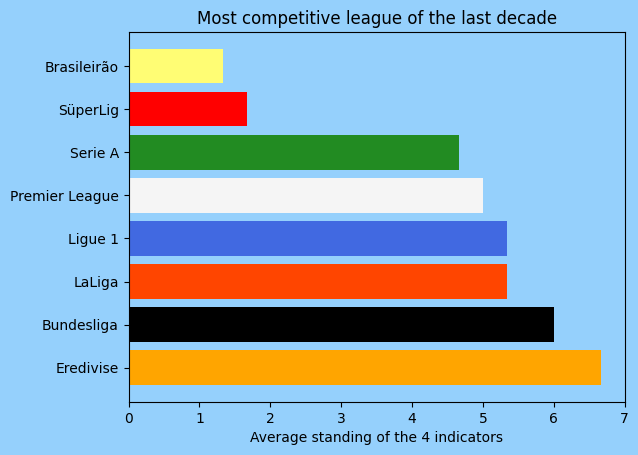

In [250]:
Result_plot=pd.DataFrame(Result.sort_values(by='Final Average',ignore_index=True,ascending=False))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Final Average'], label='Average Standing', align='center',color=['orange','black','orangered','royalblue','whitesmoke','forestgreen','red','xkcd:butter yellow'])
ax.set_title('Most competitive league of the last decade')
ax.set_xlabel('Average standing of the 4 indicators')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph1',bbox_inches='tight',dpi=300)
plt.show()

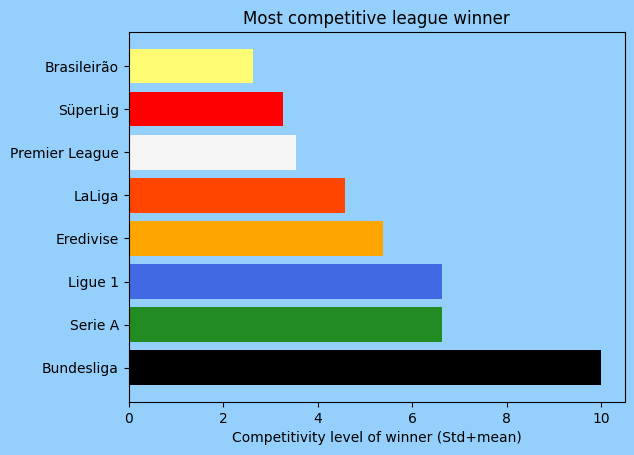

In [251]:
Result_plot=pd.DataFrame(Result.sort_values(by='Complvl Winner',ignore_index=True,ascending=False))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Complvl Winner'], label='Average Standing', align='center',color=['black','forestgreen','royalblue','orange','orangered','whitesmoke','red','xkcd:butter yellow'])
ax.set_title('Most competitive league winner')
ax.set_xlabel('Competitivity level of winner (Std+mean)')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph2',bbox_inches='tight',dpi=300)
plt.show()

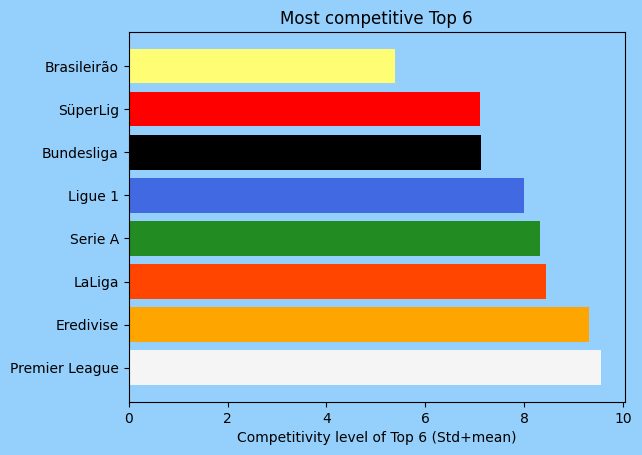

In [252]:
Result_plot=pd.DataFrame(Result.sort_values(by='Complvl Top 6',ignore_index=True,ascending=False))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Complvl Top 6'], label='Average Standing', align='center',color=['whitesmoke','orange','orangered','forestgreen','royalblue','black','red','xkcd:butter yellow'])
ax.set_title('Most competitive Top 6')
ax.set_xlabel('Competitivity level of Top 6 (Std+mean)')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph3',bbox_inches='tight',dpi=300)
plt.show()

In [243]:
plt.get_backend()

'module://matplotlib_inline.backend_inline'

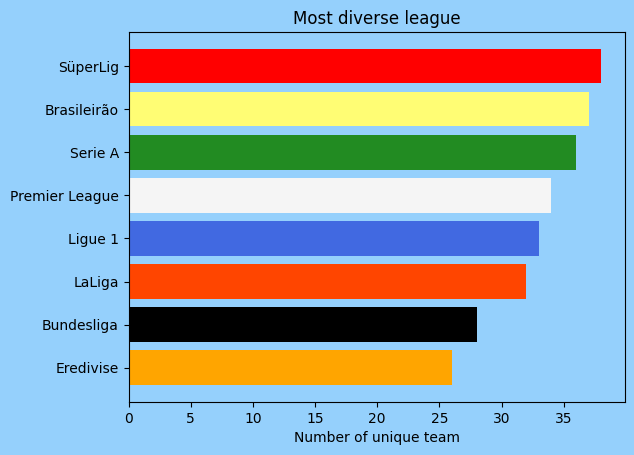

In [253]:
Result_plot=pd.DataFrame(Result.sort_values(by='Unique All',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Unique All'], label='Average Standing', align='center',color=['orange','black','orangered','royalblue','whitesmoke','forestgreen','xkcd:butter yellow','red'])
ax.set_title('Most diverse league')
ax.set_xlabel('Number of unique team')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph4',bbox_inches='tight',dpi=300)
plt.show()

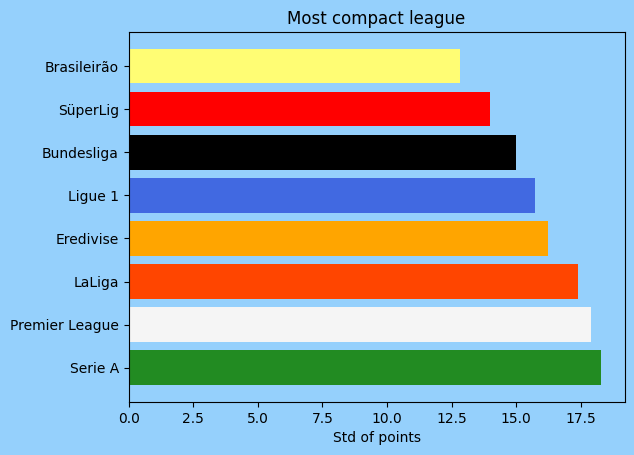

In [257]:
Result_plot=pd.DataFrame(Result.sort_values(by='Std All',ignore_index=True,ascending=False))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Std All'], label='Average Standing', align='center',color=['forestgreen','whitesmoke','orangered','orange','royalblue','black','red','xkcd:butter yellow'])
ax.set_title('Most compact league')
ax.set_xlabel('Std of points')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph5',bbox_inches='tight',dpi=300)
plt.show()

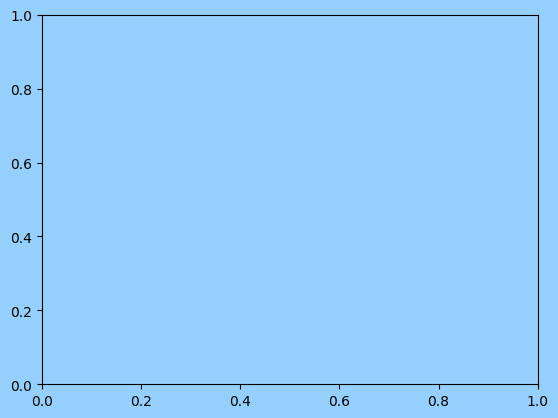

In [255]:
fig, ax = plt.subplots()
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
